@ C. Giuppone . Reduccion de datos para detectar binarias . Masa 13/6.

    planet 1      , planet2  
    
(Mp,e,w,t0,z0,P,Mp2,e2,w2,t02,P2,t

mass(Mj),e,w(rad),t0(jd),z0(s),P(y),t(jd)

#areglar orden de params!!!

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import rebound
from math import *    #importa todas las operaciones matemáticas de math (sin, cos, tan, sqrt, pi, etc)

In [2]:
#anomalía eccéntrica
def ae(e,M):
    E = M #Valor inicial para iteración
    i = 0
    while True:
        E0 = E
        E = M + e*np.sin(E0)
        i = i+1
        D = (E-E0).astype('float')
        if (abs(D)<0.0001):
            return E
            break
#Anomalía verdadera:  Tan(F/2) = ee*Tan(E/2) #giuppone
def F(e,M):
    ee=np.sqrt((1+e)/(1-e))
    
    ss = sqrt(1. + e)*sin(ae(e,M)/2.)
    cs = sqrt(1. - e)*cos(ae(e,M)/2.)
    F   = 2*atan2(ss,cs)   #anomalía verdadera en cuadrante correcto
    return F            

Constantes

In [3]:
# https://www.iau.org/public/themes/measuring/ 
uam     = 1.495978707e11
c       = 2.99792458e8/uam #m/s/uam == ua/s
twopi   = pi*2
dy     = 365.25
k      = 1.720209895e-02
G      = k*k
mearth = 3.04043e-6       # earth mass in solar masses
mjup   = 9.54792e-4       #pup in solar masses
rad    = twopi/360.0

In [4]:
F(0.1,100*rad)/rad

110.97786295129742

DATOS

Dibujar juntos los datos de los tiempos de tránsito de QS-vir

In [5]:
data =np.loadtxt('qsvir.dat',usecols=(1,2,3))
t = data[:,0]   #time
ti   = t[0]
tr   = t-t[0]  #gave time with respect to first observation
taur  = data[:,1]
etaur = data[:,2]

In [20]:
def tau(Mp,e,w,t0,z0,P,Mp2,e2,w2,t02,P2,t):  #P in years #z0 in secs #Mp enters in jupiter masses
#     Mp,e,w,T0,z0,P,Mp2,e2,w2,T02,P2
    n    = 2*pi/(P*365.25)
    Mpj  = Mp*mjup
    ainc = (G*(Mpj+Me)/n**2)**(1./3.)    #CG
    M    = n*(t-t0)
    f    = F(e,M)
    
    n2    = 2*pi/(P2*365.25)
    Mpj2  = Mp2*mjup
    ainc2 = (G*(Mpj2+Me)/n**2)**(1./3.)    #CG
    M2    = n2*(t-t02)
    f2    = F(e,M2)
    
#     r     = a*(1-e**2)/(1+e*cos(f))
#     zrel  = r*sin(inc)*sin(w+f)+z0
#     zab   zrel*Mp/(Me+Mp)
#    z  =a*(1-e**2)/(1+e*cos(f))*sin(inc)*sin(f+w)+z0   #r*sin(inc)*sin(w+f)+z0
    z  =     ainc*Mpj/(Me+Mpj)*(1-e**2)/(1+e*cos(f))*sin(f+w)
    z  = z + ainc2*Mpj2/(Me+Mpj2)*(1-e2**2)/(1+e2*cos(f2))*sin(f2+w2) 
    tau=z/c+z0
    return tau

Dibujar ambas curvas

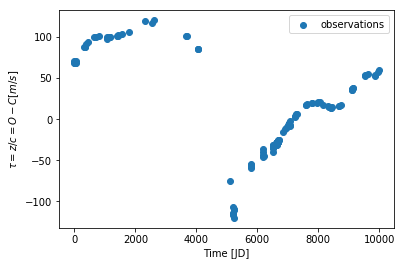

In [21]:
#plt.scatter(times,z[1]/c*mp/(m0+m1+mp), label='n-body')
plt.scatter(tr,taur, label='observations')
#plt.plot(times*1.3,(z[1]/c*mp/(m0+m1+mp))*1.5-90, label='n-body corrected')
#plt.xlim(0,7000)
plt.xlabel('Time [JD]')
#plt.ylim(-30,141)
plt.ylabel(r'$\tau=z/c = O-C [m/s]$')
plt.legend()
plt.show()


In [22]:
#Construct syntethic curves
def synt(Params):    #genera una curva de "z" con params
    Mp,e,w,t0,z0,P,Mp2,e2,w2,t02,P2 = Params
    n    = 2*pi/(P*365.25)
    Zsy =[]   #velocidad radial sintética (genero una curva continua sin errores)
    Tsy =[]
    nf=1000
    delta=max(t)-min(t)
    ij=0
#    print (min(t),delta)
    while ij < nf:
        tsy=min(t)+delta*ij/nf
        Zsy.append(tau(Mp,e,w,t0,z0,P,Mp2,e2,w2,t02,P2,tsy))
        Tsy.append(tsy)
        ij = ij+1
#        print (tsy,ij)       
    return Tsy,Zsy   

def OC(Params):    #genera una curva de velocidad radial con params
    Mp,e,w,t0,z0,P,Mp2,e2,w2,t02,P2 = Params
    BOC   =[]
    TOC   =[] 
    ij=0
    while ij < len(t):
        BOC.append(tau(Mp,e,w,t0,z0,P,Mp2,e2,w2,t02,P2,t=t[ij]))
#         BOC.append(tau(Mp,e,w,t0,z0,P,Mp2,e2,w2,t02,P2,t=t[ij]))
        TOC.append(t[ij])
        ij = ij+1
    return TOC,BOC    

In [23]:
#Generate synt
m0=0.78
m1=0.43
Me=m0+m1

# 1st planet
Mp,e,w,t0,z0,P = (6.64683762e+01, 9.55424521e-01, 3.24773740e+00, 5.32430641e+04, 6.37917690e-01, 2.79959842e+01)
# Mp,e,w,t0,z0,P = (5.10992945e+01,  9.38408444e-01,  3.31497377e+00,  5.34078171e+04, -7.52187550e+00, 2.95344310e+01)
# 2nd planet
Mp2=6.3  #0.05033
e2 =0.1
w2 = 337*rad
T02=2453956-(2400000)
P2 =4.78   #years

print(T0,t[0],min(t))

53831 48715.419887605 48715.419887605


In [24]:
#ainc,e,w,t0,z0,P 
Params = Mp,e,w,T0,z0,P,Mp2,e2,w2,T02,P2
tsy0,zsy0 = synt(Params)
Params = Mp,e,w,T0,z0,P,Mp2,e2,w2,57000.,P2
tsy1,zsy1 = synt(Params)
Params = Mp,e,w,T0,z0,P,Mp2,e2,w2,57000.,7.
tsy2,zsy2 = synt(Params)
Params = Mp,e,w,T0,z0,P,Mp2*0.5,e2,w2,57000.,P2
tsy3,zsy3 = synt(Params)

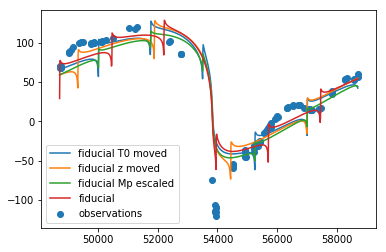

In [27]:
#the amplitude does not change with T0
plt.plot(tsy1,zsy1, label='fiducial T0 moved')
plt.plot(tsy2,zsy2, label='fiducial z moved')
plt.plot(tsy3,zsy3, label='fiducial Mp escaled')
plt.scatter(t,taur, label='observations')
plt.plot(tsy0,zsy0, label='fiducial')
plt.legend()

Maximal amplitude of TVE signal (see Woltjer 1922) <br>
$z1-z2=a sin(inc) sin (u1)=a \sin(inc) \sqrt{1-e^2 cos^2(w)}$

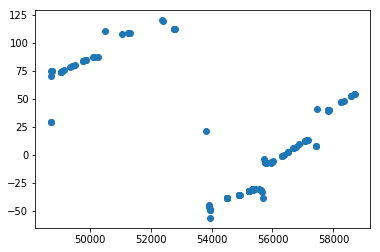

In [28]:
Params = Params = Mp,e,w,T0,z0,P,Mp2,e2,w2,T02,P2
toc0,zoc0  = OC(Params)
#Params = ainc,0.05,206*rad,T0,0.,pp
#toc1,zoc1  = OC(Params)
plt.scatter(toc0,zoc0)
#plt.scatter(toc1,zoc1)

In [40]:
#Defino una WRMS que dependa de una sóla variable (que será un arreglo) (así funciona el minimizador)
#Los DATOS que tengo son: t, taur, etaur
#P e t0 w mp v0 = Params
#bounds = ((aincm,aincmax), (emin,emax), (wmin, wmax), (t0min,t0max), (z0min,z0max), (Pmin,Pmax))
def WRMS(Params):

#    print (Params)
#    print (bounds)
    for x,r in zip(Params,bounds):    #el comando junta los datos de Params y bounds
        if x < r[0] or x > r[1]:      #si los params son mayores o menores q los bounds retorna infinito 
      #      print (x,r[0],r[1])
            return np.inf
    
    Mp,e,w,t0,z0,P,Mp2,e2,w2,t02,P2 = Params    #Arreglo a minimizar
    Be=taur
     
#    print(taur[0:2],t[0:2])
    VT=[]
    ij = 0
    while ij<len(Be):
        VT.append(tau(Mp,e,w,t0,z0,P,Mp2,e2,w2,t02,P2,t=t[ij]))
        ij = ij + 1
        
    N =len(Be)
    err   = etaur #np.sqrt(ei**2+sj**2)
    invS  =np.sum(1./err**2)
    Ab    =invS/N/(N-1.)

    WRMS=Ab*np.sum((( VT - Be)/err)**2.)
    return np.sqrt(WRMS)  

def nWRMS(Params):
    wi=WRMS(Params)
    N =len(taur)
    w2=wi*N*(N-1)
    return -0.5*w2

In [41]:
(max(t)-min(t))/365.25,max(t)-min(t)
len(Params), P2

(10, 4.78)

In [42]:
Params = 5.10992945e+01,  9.38408444e-01,  3.31497377e+00,  5.34078171e+04, -7.52187550e+00,  2.95344310e+01, Mp2,e2,w2,T02,P2

#MALLLL
# bounds = ((aincm,aincmax), (emin,emax), (wmin, wmax), (t0min,t0max), (z0min,z0max), (Pmin,Pmax))
Pmin=(t[2]-t[0])/dy
Pmax=(max(t)-min(t))/dy   #in years
t0min = min(t)
t0max = max(t)
z0min = min(taur)
z0max = max(taur)
Mpmin = 0.1  # usar definición del teórico Mjup
Mpmax = 100. # usar definición del teórico Mjup
Mp2min= 0.1  # usar definición del teórico Mjup
Mp2max= 20. # usar definición del teórico Mjup
bounds = (Mpmin,Mpmax), (0,0.99), (0, 2*pi), (t0min,t0max), (z0min,z0max), (15.,30.), (Mp2min,Mp2max), (0,0.99), (0, 2*pi), (t0min,t0max), (z0min,z0max)

WRMS(Params)

100.99901931084875

In [43]:
%%time
import scipy.optimize as optimize
#Minimize # genetics algorithm. No necesita condicion inicial...sólo bounds!
resultga0 = optimize.differential_evolution(WRMS, bounds, strategy='best1bin', maxiter=100, popsize=90,tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=True, polish=True, init='latinhypercube', atol=0)   #disp=True si queremos ver como avanza.
resultga0.x

differential_evolution step 1: f(x)= 140.068
differential_evolution step 2: f(x)= 130.185
differential_evolution step 3: f(x)= 93.8415
differential_evolution step 4: f(x)= 93.8415
differential_evolution step 5: f(x)= 93.8415
differential_evolution step 6: f(x)= 93.8415
differential_evolution step 7: f(x)= 93.8415
differential_evolution step 8: f(x)= 93.8415
differential_evolution step 9: f(x)= 93.8415
differential_evolution step 10: f(x)= 93.8415
differential_evolution step 11: f(x)= 93.8415
differential_evolution step 12: f(x)= 93.8415
differential_evolution step 13: f(x)= 93.8415
differential_evolution step 14: f(x)= 93.8415
differential_evolution step 15: f(x)= 93.8415
differential_evolution step 16: f(x)= 93.8415
differential_evolution step 17: f(x)= 93.8415
differential_evolution step 18: f(x)= 93.8415
differential_evolution step 19: f(x)= 92.0834
differential_evolution step 20: f(x)= 92.0834
differential_evolution step 21: f(x)= 92.0834
differential_evolution step 22: f(x)= 92.08

array([ 1.98320686e+01,  7.90870694e-01,  3.52190145e+00,  5.30369189e+04,
        5.67589451e+00,  2.48787276e+01,  1.27377238e+01,  1.23382757e-01,
        7.52728228e-02,  5.30409725e+04, -5.49900636e+01])

In [55]:
print(*Params)
print(*resultga0.x)
print(bounds)   #mi resultado está dando muy cerca de los BOUNDS. Repetir.
f = open("fitsMp.txt", "w")
print(resultga0.fun,resultga0.x[2]/rad)
print ("P ","ainc ", "ainc e w T0 z  P ", "WRMS ","\n",file=f, end=' ', sep=' ')
print (resultga0.x[4],resultga0.x[0],*resultga0.x,resultga0.fun,"\n",file=f, end=' ', sep=' ')
f.close()
print (*resultga0.x)

52.7 0.95 3.595378259108319 53831 0.0 18.96
23.3278717860694 0.946517360996282 3.21138154505064 53074.63827718312 15.688029939255738 27.975175873352892
((0.1, 100.0), (0, 0.99), (0, 6.283185307179586), (48715.419887605, 58706.421355722), (-119.99747701921, 120.19571762066), (15.0, 28.0))
80.66651360938413 183.9986089376031
23.3278717860694 0.946517360996282 3.21138154505064 53074.63827718312 15.688029939255738 27.975175873352892


203.01185033618052 220.13673002234492


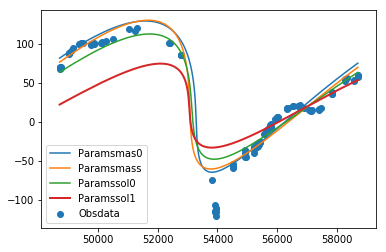

In [20]:
#Paramssol = ainc,e,w,T0,z,P wrms(80.6665)
Params2pl = (1.98320686e+01,  7.90870694e-01,  3.52190145e+00,  5.30369189e+04, 5.67589451e+00,  2.48787276e+01,               1.27377238e+01,  1.23382757e-01,  7.52728228e-02,  5.30409725e+04, -5.49900636e+01 )
Paramsmass = (2.33278718e+01, 9.46517361e-01, 3.21138155e+00, 5.30746383e+04, 1.56880299e+01, 2.79751759e+01)
Paramssol0 = (9.02724903e+00, 9.11372213e-01, 3.23027678e+00, 5.31457517e+04, 1.68270052e+01, 2.73368237e+01)
Paramssol1 = (9.38302959e+00, 9.32856790e-01, 3.17089423e+00, 5.30599905e+04, 1.66289206e+01, 2.29992555e+01)
tgam,taugam   = synt(Paramsmass)
tga ,tauga    = synt(Paramssol0)
tga1,tauga1   = synt(Paramssol1)
tgam0,taugam0   = synt(Paramsmas0)
plt.plot(tgam0,taugam0, label="Paramsmas0")
plt.plot(tgam,taugam, label="Paramsmass")
plt.plot(tga ,tauga , label="Paramssol0")
plt.plot(tga1,tauga1, label="Paramssol1", lw=2)
plt.scatter(t,taur, label="Obsdata")

plt.legend()
print (WRMS(Paramssol0),WRMS(Paramssol1))

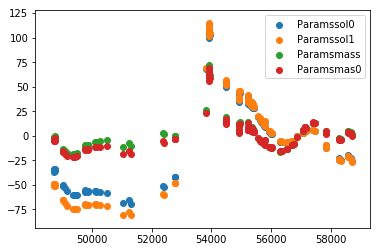

In [22]:
toc0,zoc0  = OC(Paramssol0)
toc1,zoc1  = OC(Paramssol1)
tocm,zocm  = OC(Paramsmass)
tocn,zocn  = OC(Paramsmas0)
plt.scatter(toc0,zoc0-taur, label="Paramssol0")
plt.scatter(toc1,zoc1-taur, label="Paramssol1")
plt.scatter(tocm,zocm-taur, label="Paramsmass")
plt.scatter(tocn,zocn-taur, label="Paramsmas0")
plt.legend()

In [23]:
#Paramssol = Mp,e,w,T0,z,P
print (Paramsmass)
print ((max(toc0)-min(toc0))/dy)

(23.3278718, 0.946517361, 3.21138155, 53074.6383, 15.6880299, 27.9751759)
27.353871233722106


In [ ]:
%%time
ntotg=20
asi  = 7.1 # 76^o 7.58
#x0=resultga0.x # Param0    #Param0 = (ainc, e, w, t0, z0, P)   #parámetros iniciales
#f = open("output2.txt", "w")   #write format (w) to file output.txt
resultsim = resultga0

f = open("gridP-Mp.txt", "w")
print (*resultga0.x)
print (*resultsim.x)
for ik in range(0,ntotg+1,1):
        P    =15.5+ik*(15.5)/ntotg
        bounds1 = (0.1*Mp,2*Mp), (0.7,0.99), (0, 2*pi), (t0min,t0min+P*dy), (z0min,z0max), (0.9999*P,1.0001*P)
        resultga01 = optimize.differential_evolution(WRMS, bounds1, strategy='best1bin', maxiter=40, popsize=50,tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0)   #disp=True si queremos ver como avanza.
#        resultsim  = optimize.minimize(WRMS, resultsim.x, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
        Params = resultga01.x
        print (P,a,*resultga01.x,resultga01.fun,ik, "\n",file=f, end=' ', sep=' ')
#        print (P,a,*resultsim.x,resultsim.fun,"\n",file=f, end=' ', sep=' ')
        print (P,a,resultga01.fun,WRMS(Params),ik,"\n",sep=' ')
        f.flush()
f.close()


22.009766799998953 0.9464968300248483 3.263820271735943 53289.82536112527 -0.3418193321784222 27.98912395035914
22.009766799998953 0.9464968300248483 3.263820271735943 53289.82536112527 -0.3418193321784222 27.98912395035914


/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [32]:
resultga0.x

array([9.40855868e+00, 9.28288350e-01, 3.16134493e+00, 5.30595231e+04,
       2.09722032e+01, 2.29963201e+01])

In [25]:
#resultsim = optimize.minimize(WRMS, resultga0.x, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})
resultsim.x
#print (Pmax, (max(t)-min(t))/dy)

array([9.38302959e+00, 9.32856790e-01, 3.17089423e+00, 5.30599905e+04,
       1.66289206e+01, 2.29992555e+01])

In [26]:
print (*resultsim.x,resultsim.fun)
print (*resultga0.x,resultga0.fun)

9.38302958983434 0.9328567895621869 3.170894228155362 53059.99046113527 16.628920550606182 22.999255526917317 106.76369739445624
9.38302958983434 0.9328567895621869 3.170894228155362 53059.99046113527 16.628920550606182 22.999255526917317 106.76369739445624


In [4]:
plt.scatter(t,taur)

NameError: name 'plt' is not defined

Finding optimal frequency:
 - Estimated peak width = 0.000629
 - Using 5 steps per peak; omega_step = 0.000126
 - User-specified period range:  3.6e+02 to 9.1e+03
 - Computing periods at 133 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


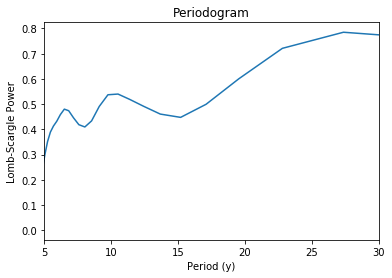

In [28]:
#Periodograma
from gatspy.periodic import LombScargleFast
from gatspy import datasets, periodic #Importo "periodic" para definir el modelo

model = periodic.LombScargleFast(fit_period=True) #Defino modelo
model.optimizer.period_range = (1.*365.25, 25.*365.25)        #Rango para buscar períodos
model.fit(t, taur, etaur)                         #Ingreso mis datos al modelo y ajusto
periods3, power3 = model.periodogram_auto()     #Obtengo resultados

#Grafico:
fig, ax = plt.subplots()
ax.plot(periods3/365.25, power3)
plt.title('Periodogram')
ax.set(xlim=(5, 30), xlabel='Period (y)', ylabel='Lomb-Scargle Power');

In [3]:
print(t[0:10],tau[0:10])


NameError: name 't' is not defined